TP 1 : Régression linéaire / polynomiale
======

# 0 - Introduction

L'objectif de ce premier TP est de se familiariser avec des outils d'apprentissage statistique. Nous les appliquerons à la régression linéaire et logistique.

Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [1]:

import numpy as np
from numpy.linalg import inv

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D # pour la gestion de figure 3D
import matplotlib.patches as mpatches

import sklearn as skl
import sklearn.datasets as data
import sklearn.linear_model

from IPython.display import display, Markdown

# 2 - Régression linéaire

## 2.1 - Génération d'un problème de régression

La bibliothèque `scikit-learn` permet de générer un problème de régression et de le résoudre.
Vous pouvez par exemple générer un problème de régression linéaire à l'aide de la fonction `make_regression` ( https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html ).

Générez un problème de régression linéaire composé de 50 points avec:
- une dimension de descripteur,
- une dimension informative,
- une dimension cible,
- un bruit d'écart type 5,
- un biais de 50.

Affichez les points obtenus. Pour simplifier la suite vous stockerez les abscisses dans un vecteur `x` et les ordonnées dans un vecteur `y`. Vérifiez vos dimensions pour n'avoir qu'une dimension dans les deux cas.

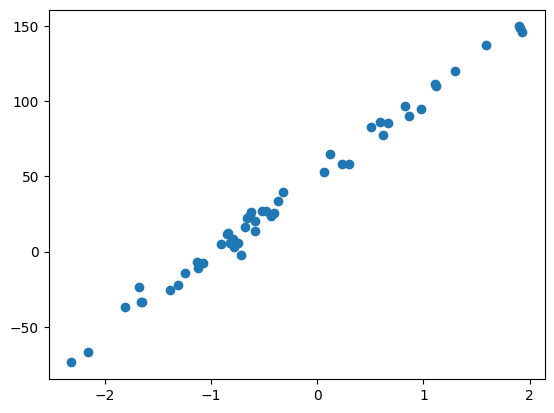

In [2]:
X,y = data.make_regression(n_samples= 50,n_features=1, noise=5,bias=50)
x = X.reshape(-1)
y = y.reshape(-1)
plt.figure()
plt.scatter(x,y)

plt.show()

## 2.2 - Résolution analytique

En vous basant sur votre cours, qu'elle est la formule analytique permettant de résoudre ce problème de régression ? 

In [ ]:
# Remplacez les ? par votre réponse
formule = '$$w_0 = moyenne(y) - w_1*moyenne(x)$$\
           $$w_1 = Covar(xy)/Var(x)$$'
display(Markdown(formule))

En utilisant la question précédente et les fonctions statistique de `numpy` ( https://numpy.org/doc/stable/reference/routines.statistics.htmlhttps://numpy.org/doc/stable/reference/routines.statistics.html ), donnez l'équation de la meilleure droite résolvant ce problème de régression.

In [4]:
covar = np.cov(np.stack((x,y)),ddof=0)
w_1 = covar[0,1]/ covar[0,0]
w_0 = np.mean(y) - w_1 * np.mean(x)
print(w_0,w_1)

50.44002928119319 51.82609042303907


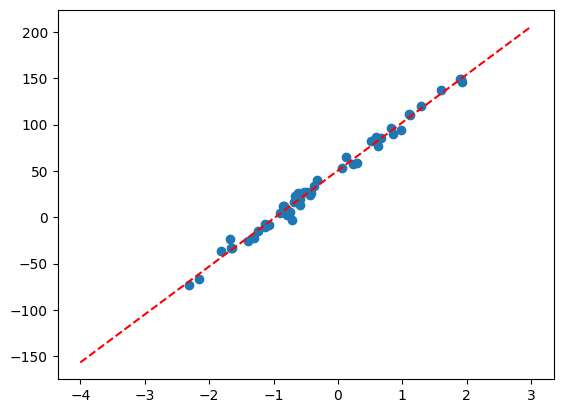

In [5]:
x_dr = np.linspace(-4,3,100)
plt.figure()
plt.scatter(x,y)
plt.plot(x_dr,w_1*x_dr+w_0,'--',color="red")

plt.show()


## 2.3 - Résolution avec scikit-learn

La bibliothèque `scikit-learn` permet de résoudre directement un problème de régression linéaire en utilisant la classe `LinearRegression` ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ). À l'aide de la documentation, résolvez le problème de régression précédent. Attention aux dimensions des entrées de la fonction `fit`.

[51.82609042] 50.44002928119319


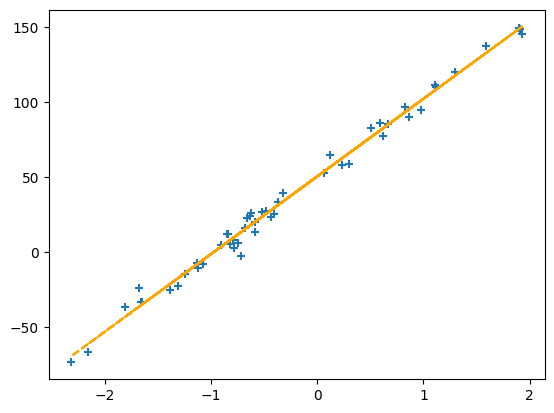

In [6]:
reg = sklearn.linear_model.LinearRegression().fit(X,y)

plt.scatter(x,y,marker="+")
plt.plot(x,reg.coef_[0]*x+reg.intercept_,'--',color='orange')
print(reg.coef_,reg.intercept_)
plt.show()

## 2.4 - Prédire de nouvelles valeurs

Prédisez les valeurs régressées pour 100 points dans un intervalle compris entre min(x) et max(x).  Utilisez la formule d'une droite avec les paramètres trouvés aux questions précédentes puis utilisez la fonction `predict` du régresseur `scikit-learn`.

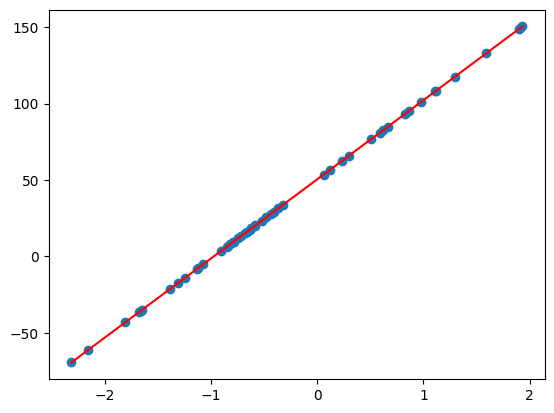

In [7]:
x_100 = np.linspace(np.min(x),np.max(x),100)
y_pred = reg.predict(X)
plt.scatter(x,y_pred)
plt.plot(x_100,reg.coef_[0]*x_100+reg.intercept_,c='red')

## 2.5 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des paramètres (w,b) appris.

In [8]:
def eval_regresseur(x,w,b):
    return w * x + b

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [9]:
def get_loss(x,y,w,b):
    return np.mean((y - eval_regresseur(x,w,b))**2)

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne deux valeurs correspondant à la dérivée de la fonction de coût par rapport à $b$ et la dérivée de la fonction de coût par rapport à $w$.

In [10]:
def get_grad_loss(x,y,w,b):
    grad_w0 = -2 * np.mean(y - eval_regresseur(x,w,b))
    grad_w1 = -2 * np.mean((y - eval_regresseur(x,w,b)) * x)
    return grad_w0,grad_w1


Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $w$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [11]:
def train_regresseur(x,y,t,N_max):
    '''
    :param X: exemples d'apprentissage
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :parame N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise (w,b), ainsi que l'évolution de la fonction de coût
    '''
    w = np.random.randn()
    b = np.random.randn()
    
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        grad_b,grad_w = get_grad_loss(x,y,w,b)
        w = w - t*grad_w
        b = b - t*grad_b
        loss += get_loss(x,y,w,b),
    return w,b,np.array(loss)

Visualisez l'évolution de la fonction de coût durant l'apprentissage. Est-elle bien décroissante ?

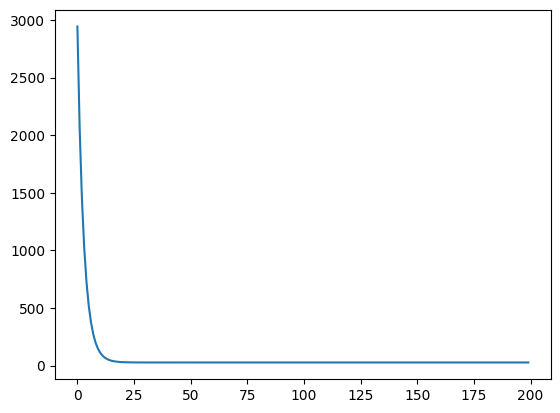

In [12]:
w,b,loss = train_regresseur(x,y,0.1,200)
plt.plot(loss)
plt.show()

Visualisez la droite apprise par votre régresseur. Est-elle correcte ?

51.82609042303904 50.44002928119314


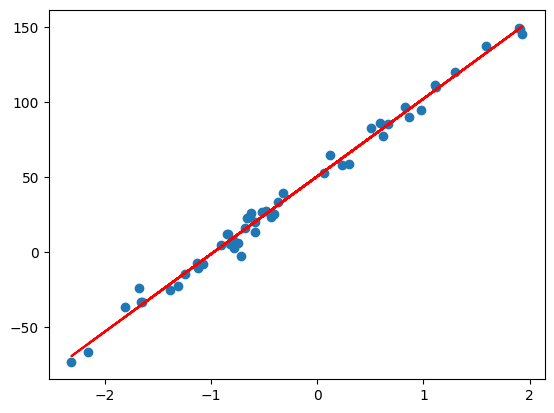

In [13]:
print(w,b)
x_dr = np.linspace(min(x),max(x),100)
plt.figure()
plt.scatter(x,y)
plt.plot(x,w*x+b,color="red")

plt.show()

# 3 - Régression polynomiale

Exécutez le code suivant pour générer un nouveau problème de régression

In [14]:
d = data.make_regression(
    n_samples = 30,
    n_features = 1,
    n_informative = 1,
    n_targets = 2,
    noise = 10
)

x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

Affichez les données générées.

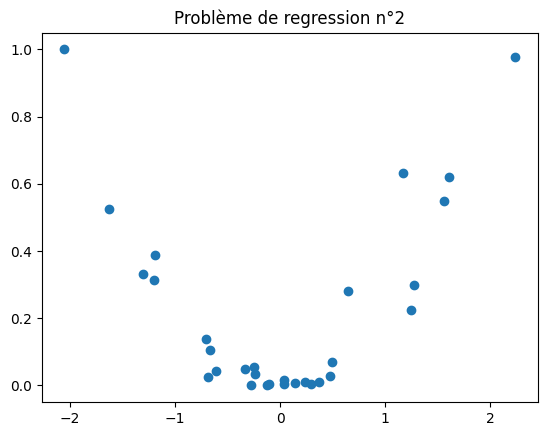

In [15]:
plt.figure()
plt.scatter(x,y)
plt.title('Problème de regression n°2')

plt.show()

## 3.1 Résolution analytique

En utilisant l'astuce vue en cours pour effectuer une régression polynomiale, faites la résolution analytique de ce problème de régression.

In [16]:
X_1 = np.ones(x.shape)
X_x = x
X_x_carre = x**2
X = np.concatenate((X_1,X_x,X_x_carre),axis = 1)
coef = np.linalg.inv(X.T@X)@X.T@y
print(coef)


[[0.01669679]
 [0.00250722]
 [0.2134328 ]]


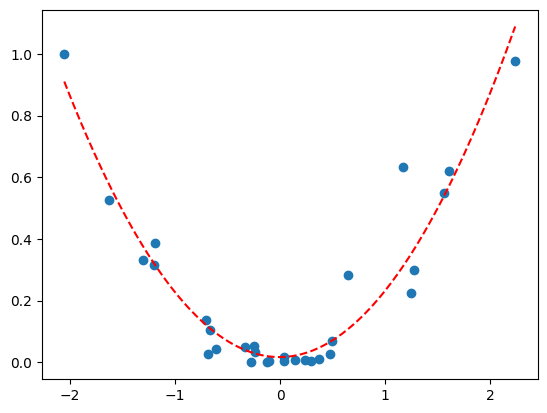

In [17]:
x1 = np.linspace(np.min(x),np.max(x),100)
plt.scatter(x,y)

plt.plot(x1,coef[2]*x1**2+coef[1]*x1+coef[0],'--',color="red")

## 3.2 Résolution avec scikit-learn

En utilisant la même astuce, résolvez ce problème de régression polynomial avec le régresseur linéaire de scikit-learn.

a:  0.21343279649292174
b:  0.0025072219896329594
c:  0.016696785538638098


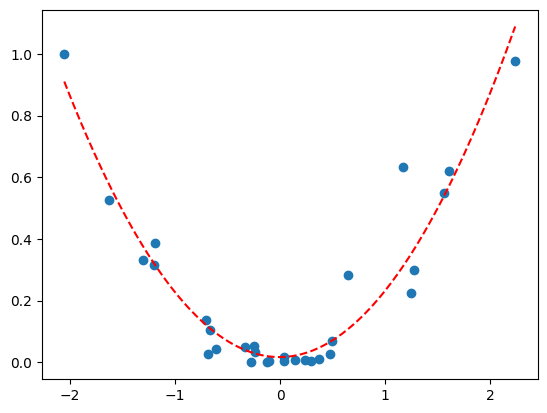

In [18]:
# Ajout d'une colonne de 1 pour les termes constants
X = np.column_stack((x, x**2))

# Initialisation du modèle de régression linéaire
reg =sklearn.linear_model.LinearRegression().fit(X, y)

# Coefficients a, b et c
a, b, c = reg.coef_[0][1], reg.coef_[0][0], reg.intercept_[0]

print("a: ", a)
print("b: ", b)
print("c: ", c)
plt.scatter(x,y)
plt.plot(x1,a*x1**2+b*x1+c,'--',color = "red")

Testez également les modèles `linear_model.Ridge` et `linear_model.Lasso` à la place de linear model.LinearRegression
. Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation.

degre :  0
coefs :  [0.]
intercept :  [0.22446208]
score :  0.0

degre :  1
coefs :  [0.         0.03923405]
intercept :  [0.22387615]
score :  0.01861709017230828

degre :  2
coefs :  [0.         0.00257512 0.21298856]
intercept :  [0.01712813]
score :  0.9154645300012256

degre :  3
coefs :  [ 0.          0.05748488  0.21698869 -0.02113597]
intercept :  [0.01627404]
score :  0.9277575004624712

degre :  4
coefs :  [ 0.          0.05439365  0.23204851 -0.01962266 -0.00384609]
intercept :  [0.01127529]
score :  0.9286471901069698

degre :  5
coefs :  [ 0.          0.04164262  0.2287889  -0.00639653 -0.00273548 -0.00243444]
intercept :  [0.01161298]
score :  0.9287608011354467

degre :  6
coefs :  [ 0.          0.04010171  0.28751207  0.00061565 -0.04495106 -0.00468756
  0.00661168]
intercept :  [0.004106]
score :  0.9315106072039823

degre :  7
coefs :  [ 0.          0.04871541  0.2905624  -0.02375376 -0.04824252  0.00919431
  0.00737742 -0.00197587]
intercept :  [0.00380973]
score :  

/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Us

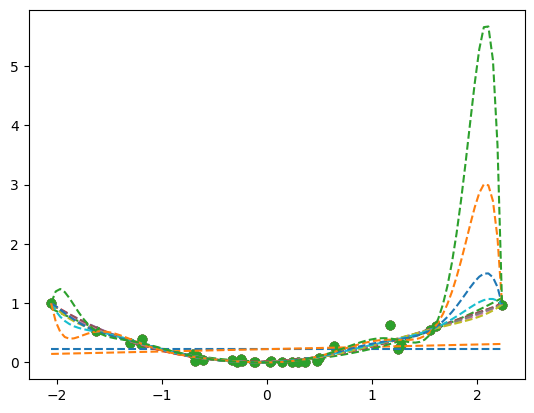

In [19]:
x1 = np.linspace(np.min(x),np.max(x),100)
for degre in range(13):
    X = np.column_stack([x**i for i in range(degre+1)])
    reg =sklearn.linear_model.Ridge(alpha=0.1).fit(X, y)
    print("degre : ",degre)
    print("coefs : ",reg.coef_)
    print("intercept : ",reg.intercept_)
    print("score : ",reg.score(X,y))
    print("")
    plt.scatter(x,y)
    plt.plot(x1,reg.predict(np.column_stack([x1**i for i in range(degre+1)])),'--')


degree :  0
coefs :  [0.]
intercept :  [0.22446208]
score :  0.0

degree :  1
coefs :  [0. 0.]
intercept :  [0.22446208]
score :  0.0

degree :  2
coefs :  [0.         0.         0.15211002]
intercept :  [0.07641788]
score :  0.839371836550863

degree :  3
coefs :  [0.         0.         0.15211002 0.        ]
intercept :  [0.07641788]
score :  0.839371836550863

degree :  4
coefs :  [ 0.          0.          0.         -0.          0.04202596]
intercept :  [0.11640913]
score :  0.7582459829607702

degree :  5
coefs :  [ 0.          0.          0.          0.          0.04387763 -0.00229796]
intercept :  [0.1137676]
score :  0.7776414269109235

degree :  6
coefs :  [ 0.          0.          0.          0.          0.04387793 -0.00229801
 -0.        ]
intercept :  [0.11376685]
score :  0.7776423006429484

degree :  7
coefs :  [ 0.          0.          0.          0.          0.04535708  0.
  0.         -0.00075199]
intercept :  [0.11150096]
score :  0.7881795585133208

degree :  8
coefs

/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e-03, tolerance: 2.430e-04
  model = cd_fast.enet_coordinate_descent(
/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.767e-03, tolerance: 2.430e-04
  model = cd_fast.enet_coordinate_descent(
/Users/noahberneaud/Documents/portfolio/M1_Informatique/Apprentissage/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning

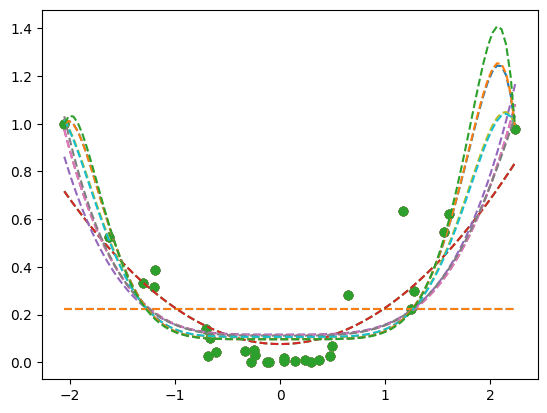

In [20]:
for degree in range(13):
    X = np.column_stack([x**i for i in range(degree+1)])
    reg =sklearn.linear_model.Lasso(alpha=0.1).fit(X, y)
    print("degree : ",degree)
    print("coefs : ",reg.coef_)
    print("intercept : ",reg.intercept_)
    print("score : ",reg.score(X,y))
    print("")
    plt.scatter(x,y)
    plt.plot(x1,reg.predict(np.column_stack([x1**i for i in range(degree+1)])),'--')